0        Comedy
1     Adventure
1         Drama
1       Fantasy
2     Biography
        ...    
61    Adventure
61       Family
61      Fantasy
62       Comedy
62        Drama
Name: Genre, Length: 159, dtype: object


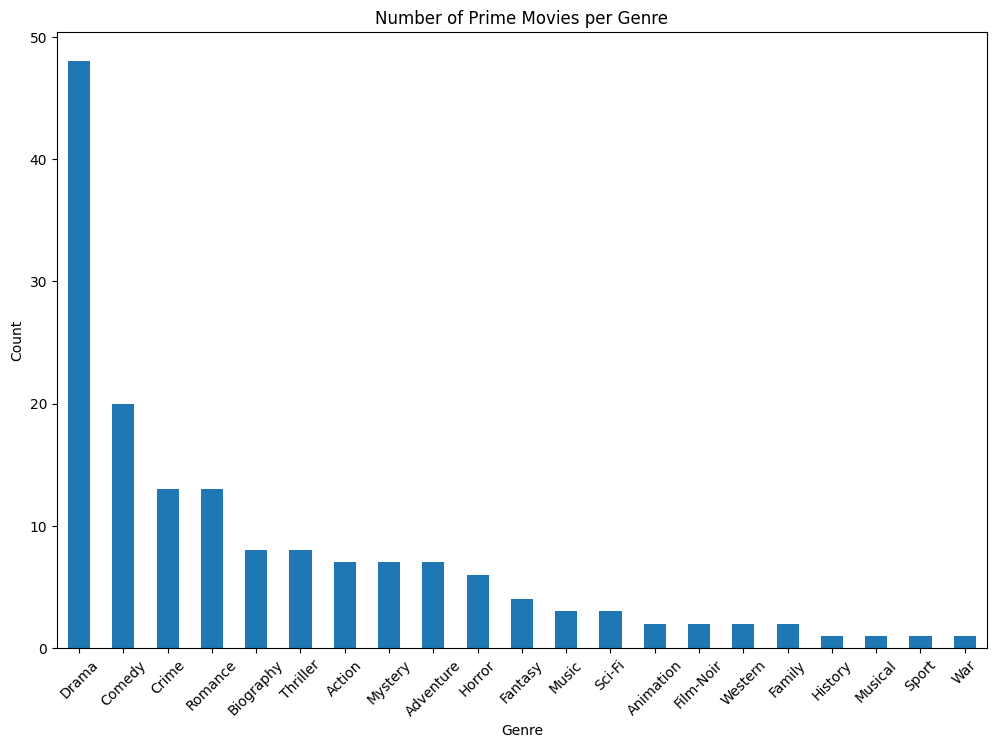

In [47]:
import pandas as pd
import numpy as np
#import csv
import matplotlib.pyplot as plt


file_path = r'C:\Users\data science\Desktop\OTT_project\raw_amazon_prime.csv'

df_prime = pd.read_csv(file_path)


file_path2 = r'C:\Users\data science\Desktop\OTT_project\imdb_top_1000.csv'
df_imdb = pd.read_csv(file_path2)

# Merge the two DataFrames based on different column names
merged_df = pd.merge(df_prime, df_imdb, left_on='title', right_on='Series_Title', how='inner')
merged_df.to_csv(r'C:\Users\data science\Desktop\OTT_project\raw_combined_prime_imdb.csv')
             
# Split the genres on commas, then explode into separate rows
genres_exploded = merged_df['Genre'].str.split(', ').explode()
print(genres_exploded)

# Count the occurrences of each genre
genre_counts = genres_exploded.value_counts()
#print(genre_counts)


# Plotting
plt.figure(figsize=(12, 8))  # Adjust the size as needed
genre_counts.plot(kind='bar')
plt.title('Number of Prime Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the genre names for better readability
plt.show()


In [48]:
'''NETFLIX and IMDB data combined'''
df3 = pd.read_csv(r'C:\Users\data science\Desktop\OTT_project\raw_combined_netflix_imdb.csv')

genres_counts_netflix = merged_df['Genre'].str.split(', ').explode().value_counts()






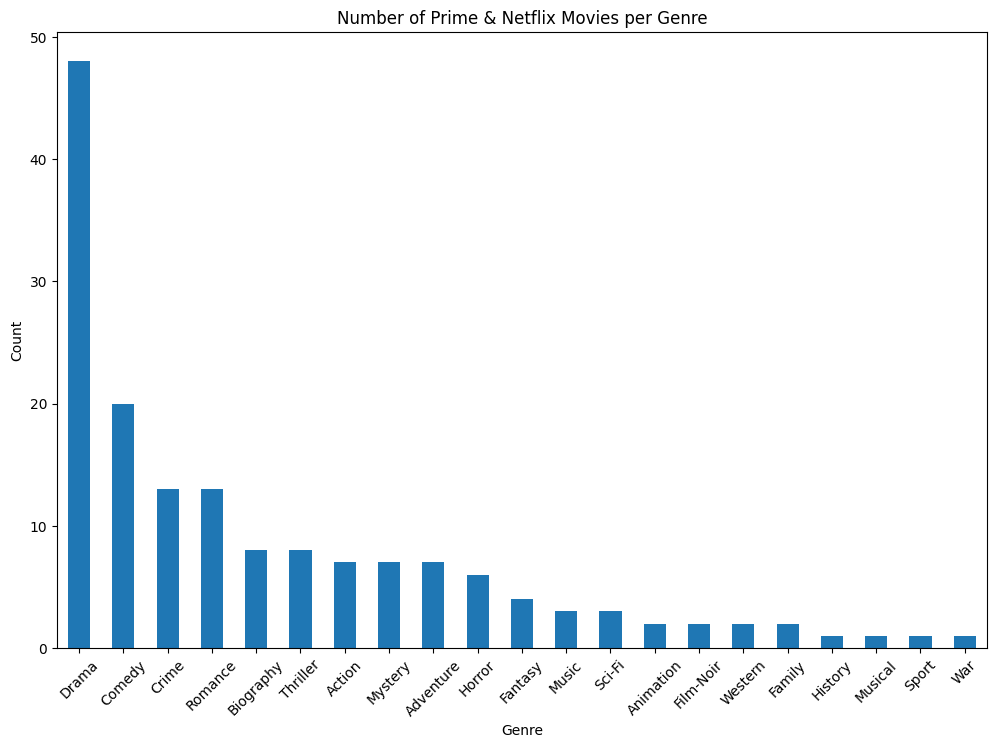

<Axes: xlabel='Genre'>

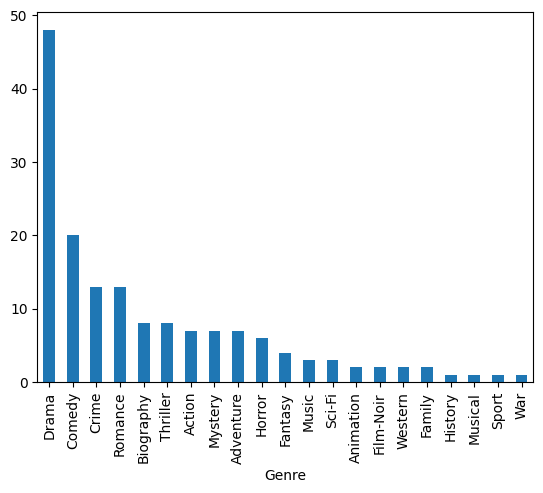

In [49]:
'''
Plotting
'''

plt.figure(figsize=(12, 8))  # Adjust the size as needed
genre_counts.plot(kind='bar')
genres_counts_netflix.plot(kind='bar')
plt.title('Number of Prime & Netflix Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate the genre names for better readability
plt.show()

